<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/modeling/where_modeling/CA_KNN_RF_MergeSupetSetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

This colab is for KNN similarity 
* to find the counties from Oregon, that are similar to CA widespread counties


# Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
import warnings; warnings.simplefilter('ignore')

In [3]:
#drive.flush_and_unmount(600000)

In [3]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

 All_CovidDataFeb20.csv
 alldatasets_Feb20.csv
 All_GoogleMobilityDataFeb20.csv
 All_SocialDistancingDataFeb20.csv
 AllStates_Superset_dataset_Feb20.csv
 AllStates_Superset_dataset_Feb21.csv
 CA_alldatasets_Feb05.csv
 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb05.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb06.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_combined_Feb04.csv
 CA_CovidDataJan10.csv
 CA_dataset_Feb11.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb05.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb06.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Feb04.csv
 CA_processedMarylandData_Feb05.csv
 CA_processedMarylandData_Feb12.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 CA_socialDistancingInertiaData_Feb04.csv
 CA_SuperData_Labeled_CDCGuideline_Feb13.csv
 CA_Superset_bins_dataset_Feb20.csv
 CA_Superset_dataset_Feb12.csv
 computed_CA_mobility_data.csv
 data-

# Import package

In [3]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

# Load Oregon  Superset Data

In [4]:
or_bin_superset_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/AllStates_Superset_dataset_Feb21.csv',low_memory=False)



In [5]:
print(or_bin_superset_data.shape)


(3101381, 60)


In [6]:
or_bin_superset_data = or_bin_superset_data[or_bin_superset_data['Province_State'] == 'Oregon']
print(or_bin_superset_data.shape)

(56916, 60)


In [7]:
or_bin_superset_data.head(2)

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
45007,2020-03-01,Oregon,41031,0,Jefferson County,0.0,7.866,79,27.0,11.0,0.0,0.0,1.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,27,23,3.33,32.4,2.0,42.2,0.3,3.03,0,24192,4.0,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0,0.0,37,48.8,0.0,0.0,0.0,0,0,0.04,0,1.0,3.3,6.8,0.6,0.0,0.0,39.919097
45008,2020-03-01,Oregon,41031,0,Jefferson County,0.0,5.389,69,27.0,11.0,0.0,0.0,1.0,0.0,5.013675,Oregon,OR,41031,Jefferson County,41,27,23,3.33,32.4,2.0,42.2,0.3,3.03,0,24192,4.0,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.0,0.0,37,48.8,0.0,0.0,0.0,0,0,0.04,0,1.0,3.3,6.8,0.6,0.0,0.0,33.265914


# XTest-YTest

array(['minimal', 'moderate', 'substantial', 'widespread', 0, 1, 2, 3],
      dtype=object)

In [8]:
#Y_col = merged_superset['growth_label_cat']
X_col = ['mask_rule_severity','m50_index','retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                'residential_percent_change_from_baseline','PopDensity','Social.distancing.index',
                'X..staying.home','Trips.person','X..out.of.county.trips',	'X..out.of.state.trips',
                'Miles.person',	'Work.trips.person','Non.work.trips.person','X..change.in.consumption',
                'Transit.mode.share','X..people.older.than.60',	'Median.income',	'X..African.Americans',
                'X..Hispanic.Americans',	'X..Male','Employment.density',	'X..hot.spots.1000.people',
                'Hospital.beds.1000.people',	'ICUs.1000.people',
                #'New.cases.1000.people',	
                'Active.cases.1000.people',	'X.days..decreasing.COVID.cases',
                'X..hospital.bed.utilization',	'Testing.capacity',	'Tests.done.1000.people',	'X..ICU.utilization',
                'Ventilator.shortage',	'Imported.COVID.cases',	'COVID.exposure.1000.people',	'X.days..decreasing.ILI.cases',
                'Unemployment.claims.1000.people',	'Unemployment.rate',	'X..working.from.home',
                'Cumulative.inflation.rate'	,'COVID.death.rate'#,
                #'positivity_rate'
                ]

In [9]:
X_test = or_bin_superset_data[X_col]

# Load RF Model

In [10]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/models/'
filename = location+'RF.pkl'


# Load the pickled model 
loaded_model = pickle.load(open(filename, 'rb'))
      
# Use the loaded pickled model to make predictions
#Y_test = pd.DataFrame(columns = 'growth_label_cat') 
Y_predict= loaded_model.predict(X_test) 

#accuracy = loaded_model.score(X_test, Y_test)
#print("accuracy=", accuracy)

In [11]:
or_bin_superset_data['growth_label_cat'] = Y_predict

In [12]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3]

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat


In [13]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2]

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat
50736,2020-12-03,Oregon,41031,4,Jefferson County,10.0,3.234,42,-16.0,0.0,0.0,38.0,-24.0,7.0,5.013675,Oregon,OR,41031,Jefferson County,41,25,24,3.56,33.1,1.8,36.8,0.52,3.04,4,24192,4.3,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.4823,7.77,0,56.336276,3.9,487.52,14.56,54,142,14.41,21,3.7,7.4,34.0,1.71,1.61,16.534392,35.430839,2
50744,2020-12-03,Oregon,41031,4,Jefferson County,10.0,4.892,60,-16.0,0.0,0.0,38.0,-24.0,7.0,5.013675,Oregon,OR,41031,Jefferson County,41,25,24,3.56,33.1,1.8,36.8,0.52,3.04,4,24192,4.3,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.4823,7.77,0,56.336276,3.9,487.52,14.56,54,142,14.41,21,3.7,7.4,34.0,1.71,1.61,16.534392,16.534392,2
50748,2020-12-03,Oregon,41031,4,Jefferson County,10.0,3.294,60,-16.0,0.0,0.0,38.0,-24.0,7.0,5.013675,Oregon,OR,41031,Jefferson County,41,25,24,3.56,33.1,1.8,36.8,0.52,3.04,4,24192,4.3,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.4823,7.77,0,56.336276,3.9,487.52,14.56,54,142,14.41,21,3.7,7.4,34.0,1.71,1.61,16.534392,16.534392,2
50750,2020-12-03,Oregon,41031,4,Jefferson County,10.0,2.453,42,-16.0,0.0,0.0,38.0,-24.0,7.0,5.013675,Oregon,OR,41031,Jefferson County,41,25,24,3.56,33.1,1.8,36.8,0.52,3.04,4,24192,4.3,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.4823,7.77,0,56.336276,3.9,487.52,14.56,54,142,14.41,21,3.7,7.4,34.0,1.71,1.61,16.534392,16.534392,2
50755,2020-12-03,Oregon,41031,4,Jefferson County,10.0,5.673,50,-16.0,0.0,0.0,38.0,-24.0,7.0,5.013675,Oregon,OR,41031,Jefferson County,41,25,24,3.56,33.1,1.8,36.8,0.52,3.04,4,24192,4.3,1.08,26,50339,0.9,20.0,51.89,4,102,2.2,0.2,0.024,0.4823,7.77,0,56.336276,3.9,487.52,14.56,54,142,14.41,21,3.7,7.4,34.0,1.71,1.61,16.534392,16.534392,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655569,2020-12-19,Oregon,41071,44,Yamhill County,10.0,2.801,45,-23.0,-3.0,19.0,0.0,-14.0,6.0,55.992733,Oregon,OR,41071,Yamhill County,41,37,30,3.44,30.1,1.2,42.0,0.31,3.13,44,107002,0.8,0.74,23,59484,0.8,15.8,49.98,42,130,2.2,0.2,0.024,0.2804,9.65,4,57.195429,4.2,576.47,13.84,62,689,19.93,35,3.7,8.9,32.7,1.71,1.60,41.120727,34.712302,2
2655571,2020-12-21,Oregon,41071,16,Yamhill County,10.0,3.468,56,-10.0,1.0,8.0,-61.0,-38.0,10.0,55.992733,Oregon,OR,41071,Yamhill County,41,34,27,3.41,30.6,0.8,35.7,0.56,2.85,16,107002,-8.2,0.74,23,59484,0.8,15.8,49.98,42,130,2.2,0.2,0.024,0.2741,9.44,6,57.329376,4.2,589.98,15.63,63,654,19.96,35,3.7,9.6,30.1,1.71,1.61,14.952992,31.641598,2
2655572,2020-12-22,Oregon,41071,37,Yamhill County,10.0,3.768,61,-5.0,14.0,35.0,-58.0,-39.0,10.0,55.992733,Oregon,OR,41071

# Load KNN Model

In [14]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/models/'
filename = location+'KNN.pkl'


# Load the pickled model 
loaded_model = pickle.load(open(filename, 'rb'))
      
# Use the loaded pickled model to make predictions
#Y_test = pd.DataFrame(columns = 'growth_label_cat') 
Y_predict= loaded_model.predict(X_test) 

#accuracy = loaded_model.score(X_test, Y_test)
#print("accuracy=", accuracy)

In [15]:
or_bin_superset_data['growth_label_cat'] = Y_predict
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3]

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat
1101504,2020-12-25,Oregon,41047,0,Marion County,10.0,4.885,36,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,20.015848,3
1101505,2020-12-25,Oregon,41047,0,Marion County,10.0,0.284,3,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,16.679873,3
1101506,2020-12-25,Oregon,41047,0,Marion County,10.0,0.883,9,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,13.343899,3
1101507,2020-12-25,Oregon,41047,0,Marion County,10.0,1.306,10,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,10.007924,3
1101508,2020-12-25,Oregon,41047,0,Marion County,10.0,2.277,28,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,6.671949,3
1101509,2020-12-25,Oregon,41047,0,Marion County,10.0,0.517,7,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,3.335975,3
1101510,2020-12-25,Oregon,41047,0,Marion County,10.0,0.856,10,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,0.000000,3
1101511,2020-12-25,Oregon,41047,0,Marion County,10.0,0.532,3,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,109.743371,Oregon,OR,41047,Marion County,41,61,39,2.13,33.0,2.4,27.8,0.29,1.84,0,346868,-42.1,1.84,21,56097,1.2,26.3,49.87,119,125,2.2,0.2,0.024,0.197,9.02,5,57.699507,4.2,605.5,13.01,66,1406,19.47,35,3.7,9.6,30.1,1.71,1.73,0.0,0.000000,3
1101512,2020-12-25,Oregon,41047,0,Ma

In [19]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3].describe()

,FIPS,New cases,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,CTFIPS,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat
count,17.0,17.0,17.0,17.000000,17.000000,17.0,17.0,17.0,17.0,17.0,17.0,1.700000e+01,17.0,17.0,17.0,17.0,1.700000e+01,17.0,1.700000e+01,1.700000e+01,17.00,17.00,17.0,17.0,1.700000e+01,17.00,17.0,17.0,1.700000e+01,1.700000e+01,17.00,17.0,17.0,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.0,1.700000e+01,1.700000e+01,17.0,1.700000e+01,17.0,17.0,17.00,17.0,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.0,17.000000,17.0
mean,41047.0,0.0,10.0,1.787824,15.411765,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,1.097434e+02,41047.0,41.0,61.0,39.0,2.130000e+00,33.0,2.400000e+00,2.780000e+01,0.29,1.84,0.0,346868.0,-4.210000e+01,1.84,21.0,56097.0,1.200000e+00,2.630000e+01,49.87,119.0,125.0,2.200000e+00,2.000000e-01,2.400000e-02,1.970000e-01,9.020000e+00,5.0,5.769951e+01,4.200000e+00,605.5,1.301000e+01,66.0,1406.0,19.47,35.0,3.700000e+00,9.600000e+00,3.010000e+01,1.710000e+00,1.730000e+00,0.0,4.120910,3.0
std,0.0,0.0,0.0,1.709160,12.659279,0.0,0.0,0.0,0.0,0.0,0.0,4.394464e-14,0.0,0.0,0.0,0.0,4.577567e-16,0.0,4.577567e-16,7.324107e-15,0.00,0.00,0.0,0.0,7.324107e-15,0.00,0.0,0.0,2.288783e-16,7.324107e-15,0.00,0.0,0.0,4.577567e-16,2.860979e-17,3.576224e-18,5.721958e-17,1.831027e-15,0.0,1.464821e-14,9.155134e-16,0.0,1.831027e-15,0.0,0.0,0.00,0.0,9.155134e-16,1.831027e-15,7.324107e-15,6.866350e-16,2.288783e-16,0.0,6.726914,0.0
min,41047.0,0.0,10.0,0.044000,0.000000,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,1.097434e+02,41047.0,41.0,61.0,39.0,2.130000e+00,33.0,2.400000e+00,2.780000e+01,0.29,1.84,0.0,346868.0,-4.210000e+01,1.84,21.0,56097.0,1.200000e+00,2.630000e+01,49.87,119.0,125.0,2.200000e+00,2.000000e-01,2.400000e-02,1.970000e-01,9.020000e+00,5.0,5.769951e+01,4.200000e+00,605.5,1.301000e+01,66.0,1406.0,19.47,35.0,3.700000e+00,9.600000e+00,3.010000e+01,1.710000e+00,1.730000e+00,0.0,0.000000,3.0
25%,41047.0,0.0,10.0,0.532000,7.000000,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,1.097434e+02,41047.0,41.0,61.0,39.0,2.130000e+00,33.0,2.400000e+00,2.780000e+01,0.29,1.84,0.0,346868.0,-4.210000e+01,1.84,21.0,56097.0,1.200000e+00,2.630000e+01,49.87,119.0,125.0,2.200000e+00,2.000000e-01,2.400000e-02,1.970000e-01,9.020000e+00,5.0,5.769951e+01,4.200000e+00,605.5,1.301000e+01,66.0,1406.0,19.47,35.0,3.700000e+00,9.600000e+00,3.010000e+01,1.710000e+00,1.730000e+00,0.0,0.000000,3.0
50%,41047.0,0.0,10.0,1.306000,10.000000,-84.0,-52.0,-35.0,-57.0,-82.0,25.0,1.097434e+02,41047.0,41.0,61.0,39.0,2.130000e+00,33.0,2.400000e+00,2.780000e+01,0.29,1.84,0.0,346868.0,-4.210000e+01,1.84,21.0,56097.0,1.200000e+00,2.630000e+01,49.87,119.0,125.0,2.200000e+00,2.000000e-01,2.400000e-02,1.970000e-01,9.020000e+00,5.0,5.769951e+01,4.200000e+00,605.5,1.301000e+01,66.0,1406.0,19.47,35.0,3.700000e+00,9.600000e+00,3.010000e+01,1.710000e+00,1.730000e+00,0.0,0.000000,3.0
75%

In [15]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==2]

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat
910307,2020-12-20,Oregon,41029,45,Jackson County,10.0,4.428,62,-10.0,-3.0,24.0,-20.0,-9.0,3.0,29.723811,Oregon,OR,41029,Jackson County,41,41,29,3.05,14.9,4.4,30.6,0.22,2.83,45,219564,-12.0,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2915,9.60,1,57.259598,4.3,576.47,13.84,63,683,19.99,35,3.7,9.6,30.1,1.71,1.60,20.495163,22.316955,2
910308,2020-12-20,Oregon,41029,45,Jackson County,10.0,5.759,37,-10.0,-3.0,24.0,-20.0,-9.0,3.0,29.723811,Oregon,OR,41029,Jackson County,41,41,29,3.05,14.9,4.4,30.6,0.22,2.83,45,219564,-12.0,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2915,9.60,1,57.259598,4.3,576.47,13.84,63,683,19.99,35,3.7,9.6,30.1,1.71,1.60,20.495163,20.495163,2
910309,2020-12-20,Oregon,41029,45,Jackson County,10.0,10.140,63,-10.0,-3.0,24.0,-20.0,-9.0,3.0,29.723811,Oregon,OR,41029,Jackson County,41,41,29,3.05,14.9,4.4,30.6,0.22,2.83,45,219564,-12.0,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2915,9.60,1,57.259598,4.3,576.47,13.84,63,683,19.99,35,3.7,9.6,30.1,1.71,1.60,20.495163,20.495163,2
910310,2020-12-20,Oregon,41029,45,Jackson County,10.0,8.276,51,-10.0,-3.0,24.0,-20.0,-9.0,3.0,29.723811,Oregon,OR,41029,Jackson County,41,41,29,3.05,14.9,4.4,30.6,0.22,2.83,45,219564,-12.0,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2915,9.60,1,57.259598,4.3,576.47,13.84,63,683,19.99,35,3.7,9.6,30.1,1.71,1.60,20.495163,20.495163,2
910311,2020-12-20,Oregon,41029,45,Jackson County,10.0,4.000,52,-10.0,-3.0,24.0,-20.0,-9.0,3.0,29.723811,Oregon,OR,41029,Jackson County,41,41,29,3.05,14.9,4.4,30.6,0.22,2.83,45,219564,-12.0,1.11,29,50851,0.6,12.5,48.75,32,158,2.2,0.2,0.024,0.2915,9.60,1,57.259598,4.3,576.47,13.84,63,683,19.99,35,3.7,9.6,30.1,1.71,1.60,20.495163,20.495163,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653879,2020-12-24,Oregon,41051,179,Multnomah County,10.0,2.099,41,-32.0,18.0,17.0,-54.0,-64.0,16.0,715.275377,Oregon,OR,41051,Multnomah County,41,37,31,3.25,33.7,10.5,35.2,0.23,3.02,179,811880,0.1,11.61,18,64337,5.3,11.4,49.54,1180,185,2.2,0.2,0.024,0.2652,9.29,2,57.590477,4.2,605.50,13.01,66,5444,19.70,35,3.7,9.6,30.1,1.71,1.71,22.047593,30.405619,2
2653880,2020-12-25,Oregon,41051,0,Multnomah County,10.0,0.034,0,-85.0,-58.0,-47.0,-74.0,-84.0,27.0,715.275377,Oregon,OR,41051,Multnomah County,41,66,46,1.92,38.1,12.7,30.9,0.23,1.69,0,811880,-44.0,11.61,18,64337,5.3,11.4,49.54,1180,185,2.2,0.2,0.024,0.1519,9.02,3,57.699507,4.2,605.50,13.01,66,3737,19.47,35,3.7,9.6,30.1,1.71,1.73,0.000000,23.543240,2
2653881,2020-12-26,Oregon,41051,481,Multnomah County,10.0,0.668,

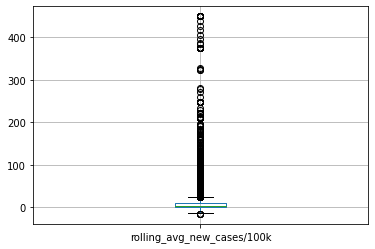

In [16]:
boxplot = or_bin_superset_data.boxplot(column=['rolling_avg_new_cases/100k'],rot=0, fontsize=10)

In [18]:
or_bin_superset_data['rolling_avg_new_cases/100k'].describe()

count    5.680200e+04
mean     9.072771e+00
std      1.914729e+01
min     -1.541489e+01
25%      4.555404e-13
50%      3.219551e+00
75%      9.536637e+00
max      4.497185e+02
Name: rolling_avg_new_cases/100k, dtype: float64

# Load XGBoost Model

In [20]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/models/'
filename = location+'XGBoost.pkl'


# Load the pickled model 
loaded_model = pickle.load(open(filename, 'rb'))
      
# Use the loaded pickled model to make predictions
#Y_test = pd.DataFrame(columns = 'growth_label_cat') 
Y_predict= loaded_model.predict(X_test) 

#accuracy = loaded_model.score(X_test, Y_test)
#print("accuracy=", accuracy)

In [21]:
or_bin_superset_data['growth_label_cat'] = Y_predict
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3]

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat
174686,2020-12-08,Oregon,41037,7,Lake County,10.0,1.580,50,0.0,0.0,0.0,0.0,-10.0,0.0,0.372079,Oregon,OR,41037,Lake County,41,48,29,2.06,24.5,6.6,23.1,0.21,1.85,7,7879,-40.2,0.20,33,36627,0.2,8.0,53.45,1,172,2.2,0.2,0.024,0.3385,8.66,5,56.526453,4.0,519.04,16.23,59,27,17.19,28,3.7,8.1,33.5,1.71,1.50,88.843762,12.691966,3
174687,2020-12-08,Oregon,41037,7,Lake County,10.0,8.453,80,0.0,0.0,0.0,0.0,-10.0,0.0,0.372079,Oregon,OR,41037,Lake County,41,48,29,2.06,24.5,6.6,23.1,0.21,1.85,7,7879,-40.2,0.20,33,36627,0.2,8.0,53.45,1,172,2.2,0.2,0.024,0.3385,8.66,5,56.526453,4.0,519.04,16.23,59,27,17.19,28,3.7,8.1,33.5,1.71,1.50,88.843762,25.383932,3
174688,2020-12-08,Oregon,41037,7,Lake County,10.0,4.323,49,0.0,0.0,0.0,0.0,-10.0,0.0,0.372079,Oregon,OR,41037,Lake County,41,48,29,2.06,24.5,6.6,23.1,0.21,1.85,7,7879,-40.2,0.20,33,36627,0.2,8.0,53.45,1,172,2.2,0.2,0.024,0.3385,8.66,5,56.526453,4.0,519.04,16.23,59,27,17.19,28,3.7,8.1,33.5,1.71,1.50,88.843762,38.075898,3
174689,2020-12-08,Oregon,41037,7,Lake County,10.0,4.996,67,0.0,0.0,0.0,0.0,-10.0,0.0,0.372079,Oregon,OR,41037,Lake County,41,48,29,2.06,24.5,6.6,23.1,0.21,1.85,7,7879,-40.2,0.20,33,36627,0.2,8.0,53.45,1,172,2.2,0.2,0.024,0.3385,8.66,5,56.526453,4.0,519.04,16.23,59,27,17.19,28,3.7,8.1,33.5,1.71,1.50,88.843762,50.767864,3
174691,2020-12-08,Oregon,41037,7,Lake County,10.0,2.310,77,0.0,0.0,0.0,0.0,-10.0,0.0,0.372079,Oregon,OR,41037,Lake County,41,48,29,2.06,24.5,6.6,23.1,0.21,1.85,7,7879,-40.2,0.20,33,36627,0.2,8.0,53.45,1,172,2.2,0.2,0.024,0.3385,8.66,5,56.526453,4.0,519.04,16.23,59,27,17.19,28,3.7,8.1,33.5,1.71,1.50,88.843762,76.151796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653018,2020-12-28,Oregon,41049,0,Morrow County,10.0,12.914,73,0.0,0.0,0.0,-3.0,-41.0,0.0,2.132516,Oregon,OR,41049,Morrow County,41,25,20,3.35,50.8,20.4,56.6,0.81,2.54,0,11372,-10.4,0.30,22,55440,0.2,35.9,50.67,3,104,2.2,0.2,0.024,0.2638,8.96,17,58.111926,4.3,620.04,14.56,70,157,19.47,35,3.7,9.6,30.1,1.71,1.73,0.000000,22.611929,3
2653019,2020-12-28,Oregon,41049,0,Morrow County,10.0,3.250,22,0.0,0.0,0.0,-3.0,-41.0,0.0,2.132516,Oregon,OR,41049,Morrow County,41,25,20,3.35,50.8,20.4,56.6,0.81,2.54,0,11372,-10.4,0.30,22,55440,0.2,35.9,50.67,3,104,2.2,0.2,0.024,0.2638,8.96,17,58.111926,4.3,620.04,14.56,70,157,19.47,35,3.7,9.6,30.1,1.71,1.73,0.000000,22.611929,3
2654136,2020-12-25,Oregon,41055,0,Sherman County,10.0,1.344,40,0.0,0.0,0.0,-51.0,0.0,0.0,0.752408,Oregon,OR,41055,Sherman County,41,52,39,2.37,46.6,34.0,234.5,0.06,2.31,0,1708,-24.8,0.29,32,48056,0.6,3

In [23]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3]['County Name'].unique()

array(['Lake County', 'Morrow County', 'Sherman County'], dtype=object)

In [24]:
or_bin_superset_data[or_bin_superset_data['growth_label_cat']==3].describe()

,FIPS,New cases,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,CTFIPS,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,growth_label_cat
count,107.000000,107.000000,107.0,107.000000,107.000000,107.0,107.0,107.0,107.000000,107.000000,107.0,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000,107.000000,1.070000e+02,107.000000,107.000000,1.070000e+02,107.0
mean,41039.523364,1.719626,10.0,5.032402,69.514019,0.0,0.0,0.0,-1.813084,-29.065421,0.0,0.678890,41039.523364,41.0,48.850467,31.168224,2.560093,22.742056,6.244860,28.296262,0.307290,2.252991,1.719626,8293.588785,-25.927103,0.219346,31.121495,40112.242991,0.211215,12.570093,53.005327,1.336449,162.523364,2.200000e+00,2.000000e-01,2.400000e-02,0.225589,9.141495,8.205607,57.348160,4.177570,583.338131,14.753364,63.943925,41.485981,19.191682,33.299065,3.700000e+00,9.222430,30.974766,1.710000e+00,1.643271,19.858001,2.120392e+01,3.0
std,5.214902,2.281155,0.0,4.442495,68.534713,0.0,0.0,0.0,10.673659,20.284891,0.0,0.659804,5.214902,0.0,10.998116,6.120621,0.466776,14.077890,7.888255,24.974156,0.159211,0.387104,2.281155,1725.149794,13.699563,0.039365,4.124730,7178.891531,0.066343,10.566360,1.063861,0.751651,28.865775,4.461791e-15,4.182929e-16,1.742887e-17,0.154708,0.258179,3.073742,0.529856,0.090396,34.821104,1.303559,3.778868,47.307777,0.963143,3.016355,7.138865e-15,0.645932,1.480062,6.692686e-16,0.089123,25.940361,2.257432e+01,0.0
min,41037.000000,0.000000,10.0,0.031000,0.000000,0.0,0.0,0.0,-58.000000,-75.000000,0.0,0.372079,41037.000000,41.0,21.000000,17.000000,1.600000,10.700000,0.000000,13.900000,0.050000,1.380000,0.000000,1708.000000,-55.400000,0.200000,22.000000,36627.000000,0.200000,3.600000,50.670000,1.000000,104.000000,2.200000e+00,2.000000e-01,2.400000e-02,0.000000,8.660000,5.000000,56.482800,4.000000,519.040000,13.010000,58.000000,12.000000,17.190000,28.000000,3.700000e+00,8.100000,30.100000,1.710000e+00,1.500000,0.000000,5.329071e-13,3.0
25%,41037.000000,0.000000,10.0,1.655500,36.000000,0.0,0.0,0.0,0.000000,-35.000000,0.0,0.372079,41037.000000,41.0,45.000000,28.000000,2.490000,13.700000,1.600000,17.200000,0.220000,2.180000,0.000000,7879.000000,-29.500000,0.200000,33.000000,36627.000000,0.200000,8.000000,53.450000,1.000000,172.000000,2.200000e+00,2.000000e-01,2.400000e-02,0.084600,8.960000,6.000000,57.195429,4.200000,576.470000,13.010000,62.000000,14.000000,19.470000,35.000000,3.700000e+00,8.900000,30.100000,1.710000e+00,1.600000,0.000000,5.329071e-13,3.0
50%,41037.000000,1.000000,10.0,4.118000,58.000000,0.0,0.0,0.0,0.000000,-23.000000,0.0,0.372079,41037